In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%cd /content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database

/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database"

In [16]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
!unzip \*.zip && *.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7933.png  
  inf

In [22]:
import numpy as np 
import pandas as pd 

for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/masks/Normal-792.png
/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/masks/Normal-7920.png
/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png
/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png
/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png
/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png
/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png
/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/masks/No

In [18]:
from IPython.display import clear_output
!pip install tf_explain
clear_output()
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.image as tfi
from tensorflow.keras.utils import load_img, img_to_array
from glob import glob

In [35]:
def load_image(image, SIZE):
    image = tf.cast(tfi.resize(img_to_array(load_img(image)), (SIZE, SIZE)), tf.float32)/255.
    return image

def load_images(paths, SIZE, trim=None, channels=3):
  
    if trim is not None:
        paths = paths[:trim]
        images = np.zeros(shape=(len(paths), SIZE, SIZE, channels))

    if channels==3:
        for i, path in enumerate(paths):
            img = load_image(path, SIZE)
            images[i] = img
    elif channels==1:
        for i, path in enumerate(paths):
            img = load_image(path, SIZE)
            images[i] = img[:,:,:1]
    return images

def show_image(image, title=None, cmap=None, alpha=1.0):
    plt.imshow(image, cmap=cmap, alpha=alpha)
    if title is not None: plt.title(title)
    plt.axis('off')

def show_mask(image, mask, cmap='jet', alpha=0.7):
    show_image(image)
    show_image(tf.squeeze(mask), cmap=cmap, alpha=alpha)

In [28]:
root_path = '/content/gdrive/MyDrive/Datasets/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/COVID/'
image_path = root_path + 'images/'
mask_path = root_path + 'masks/'

image_paths = sorted(glob(image_path + '*.png'))
mask_paths = []
for path in image_paths:
    mask_paths.append(path.replace('images','masks'))
    
images = load_images(image_paths, SIZE=256, trim=200)
masks = load_images(mask_paths, SIZE=256, trim=200, channels=1)

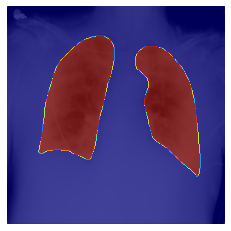

In [33]:
show_mask(images[0], masks[0], alpha=0.7)

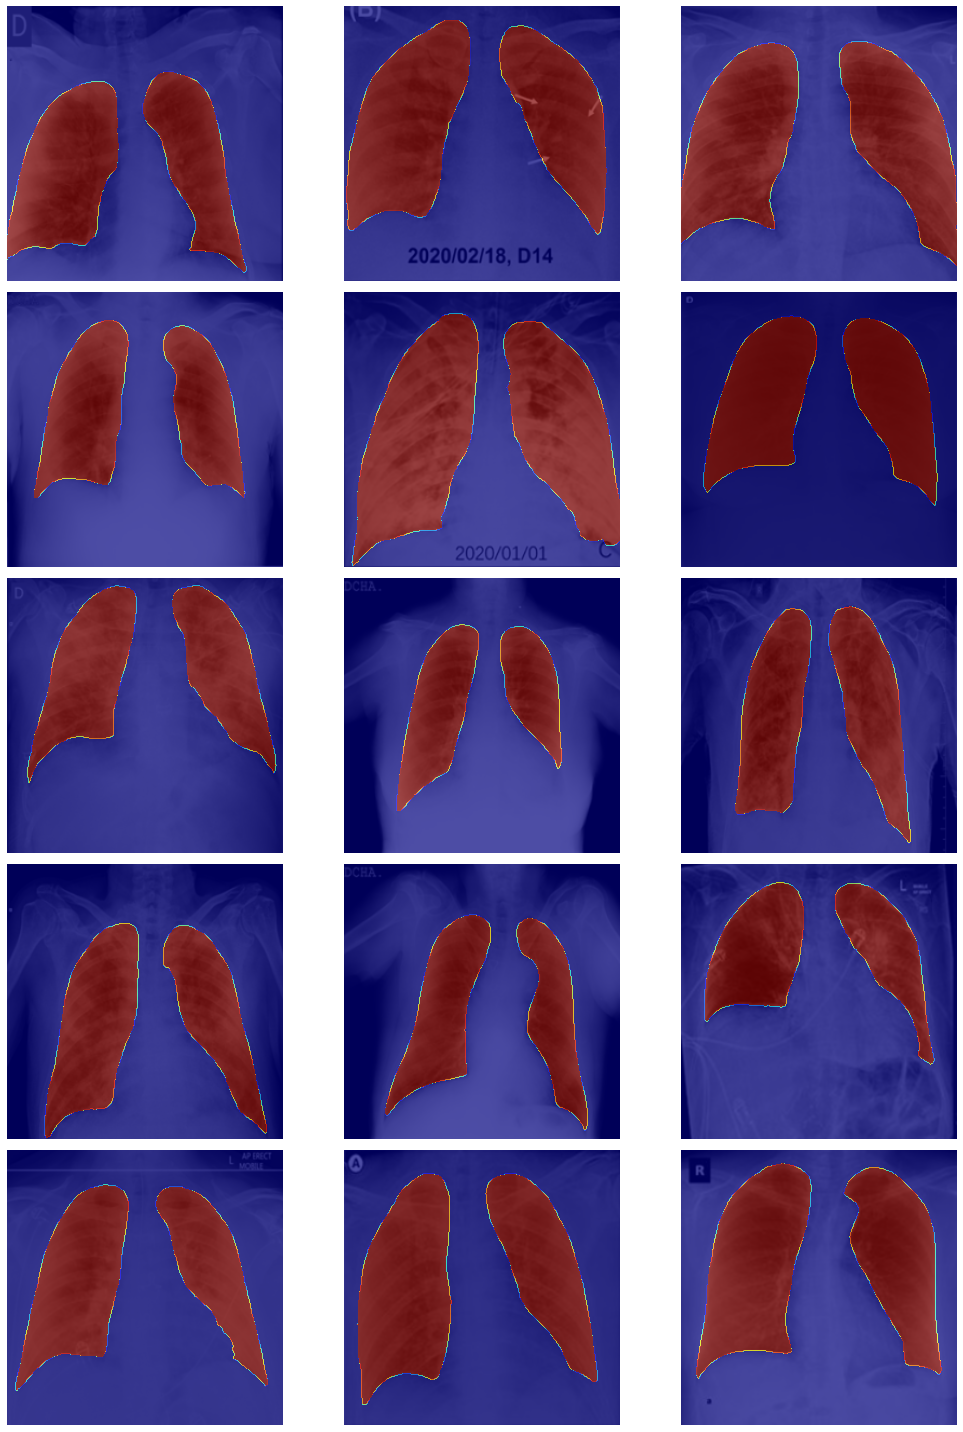

In [36]:
plt.figure(figsize=(15,20))
for i in range(1,16):
    plt.subplot(5,3,i)
    id = np.random.randint(len(images))
    show_mask(images[id], masks[id])
plt.tight_layout()
plt.show()